In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Telco_Customer_Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
numerical_cols = df.select_dtypes(include = ["number"])
numerical_cols

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [11]:
numerical_cols.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [12]:
churn_counts = df["Churn"].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

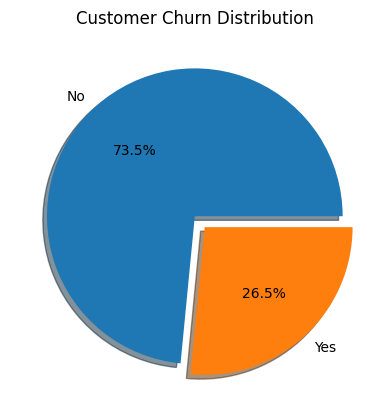

In [13]:
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', explode=[0,0.1],shadow=True)
plt.title("Customer Churn Distribution")
plt.show()

In [14]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby(["gender","Churn"])["MonthlyCharges"].mean()

gender  Churn
Female  No       61.664908
        Yes      74.812087
Male    No       60.876914
        Yes      74.066989
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby("Churn")["tenure"].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [18]:
df.groupby("Churn")["SeniorCitizen"].value_counts()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: count, dtype: int64

In [19]:
df.groupby("Contract")["MonthlyCharges"].mean()

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64

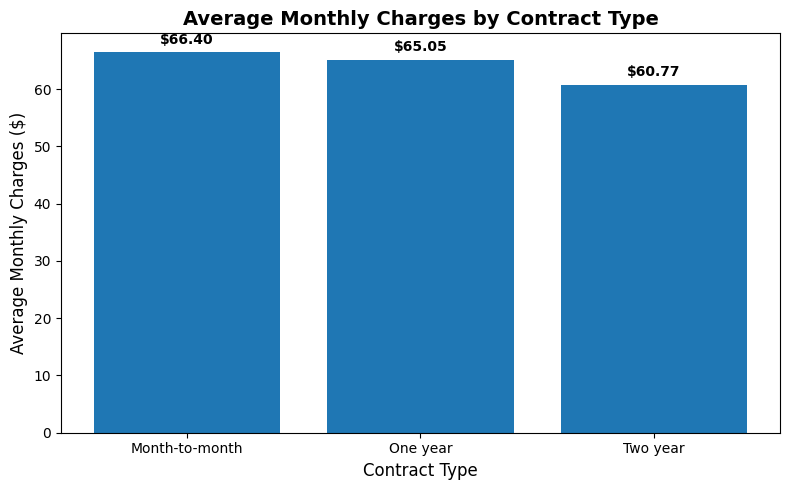

In [20]:
contract_avg = df.groupby("Contract")["MonthlyCharges"].mean()


plt.figure(figsize=(8,5))
bars = plt.bar(contract_avg.index,contract_avg.values,linewidth=1.2)


for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"${bar.get_height():.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight="bold"
    )


plt.title("Average Monthly Charges by Contract Type", fontsize=14, fontweight="bold")
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Average Monthly Charges ($)", fontsize=12)
plt.tight_layout()
plt.show()

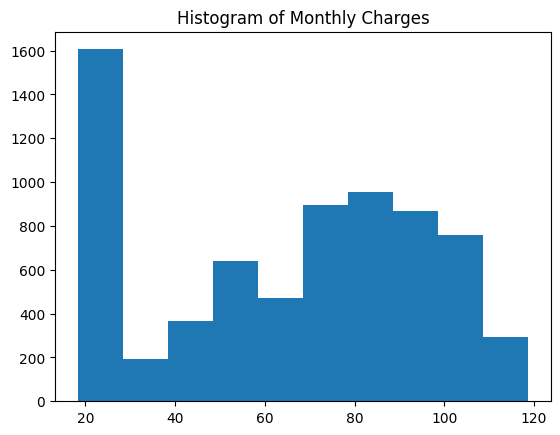

In [21]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

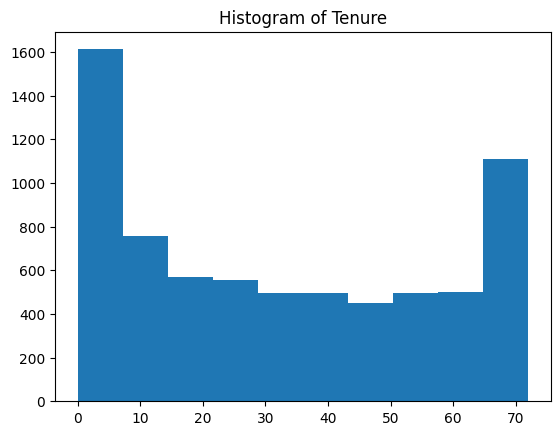

In [22]:
plt.hist(df["tenure"])
plt.title("Histogram of Tenure")
plt.show()

In [23]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
y = df[["Churn"]]
X= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [25]:
X["gender"] = X["gender"].apply(lambda x:1 if x == "Female" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\3135263918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].apply(lambda x:1 if x == "Female" else 0)


In [26]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [27]:
y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\3104515624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x:1 if x == "Yes" else 0)


In [28]:
X["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [29]:
X["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
X["Dependents"] = X["Dependents"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\4290824974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Dependents"] = X["Dependents"].apply(lambda x:1 if x == "Yes" else 0)


In [31]:
X["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
X["Partner"] = X["Partner"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\3102650122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Partner"] = X["Partner"].apply(lambda x:1 if x == "Yes" else 0)


In [33]:
X["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
X["PhoneService"] = X["Partner"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\3725127230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["PhoneService"] = X["Partner"].apply(lambda x:1 if x == "Yes" else 0)


In [35]:
X["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [36]:
X["MultipleLines"] = X["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\72561097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["MultipleLines"] = X["MultipleLines"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [37]:
X["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [38]:
X["InternetService"] = X["InternetService"].apply(lambda x: 1 if x == "DSL" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\449796757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["InternetService"] = X["InternetService"].apply(lambda x: 1 if x == "DSL" else 0 if x == "No" else 2)


In [39]:
X["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
X["OnlineSecurity"] = X["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\1300583288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["OnlineSecurity"] = X["OnlineSecurity"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [41]:
X["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [42]:
X["OnlineBackup"] = X["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\4287770890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["OnlineBackup"] = X["OnlineBackup"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [43]:
X["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
X["DeviceProtection"] = X["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\342760035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["DeviceProtection"] = X["DeviceProtection"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [45]:
X["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [46]:
X["TechSupport"] = X["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\13978473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["TechSupport"] = X["TechSupport"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [47]:
X["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [48]:
X["StreamingTV"] = X["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\1949172541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["StreamingTV"] = X["StreamingTV"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [49]:
X["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [50]:
X["StreamingMovies"] = X["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\623072748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["StreamingMovies"] = X["StreamingMovies"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else 2)


In [51]:
X["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
X["Contract"] = X["Contract"].apply(lambda x: 0 if x == "Month-to-month" else 1 if x == "One year" else 2)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\722218184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Contract"] = X["Contract"].apply(lambda x: 0 if x == "Month-to-month" else 1 if x == "One year" else 2)


In [53]:
X["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [54]:
X["PaperlessBilling"] = X["PaperlessBilling"].apply(lambda x:1 if x == "Yes" else 0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\2036149984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["PaperlessBilling"] = X["PaperlessBilling"].apply(lambda x:1 if x == "Yes" else 0)


In [55]:
X["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [56]:
X["PaymentMethod"] = X["PaymentMethod"].apply(lambda x: 0 if x == 'Electronic check' else 1 if x == "Mailed check" else 2 if x == 'Bank transfer (automatic)' else 3)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25168\4030065917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["PaymentMethod"] = X["PaymentMethod"].apply(lambda x: 0 if x == 'Electronic check' else 1 if x == "Mailed check" else 2 if x == 'Bank transfer (automatic)' else 3)


In [57]:
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.85
1,0,0,0,0,34,0,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5
2,0,0,0,0,2,0,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,1,0,0,0,2,0,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
mask = X_train['TotalCharges'] == ' '
X_train.loc[mask, 'TotalCharges'] = (X_train.loc[mask, 'MonthlyCharges'] * X_train.loc[mask, 'tenure']).astype(str)

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [70]:
mask = X_test['TotalCharges'] == ' '
X_test.loc[mask, 'TotalCharges'] = (X_test.loc[mask, 'MonthlyCharges'] * X_test.loc[mask, 'tenure']).astype(str)

X_test = scaler.fit_transform(X_test)

In [72]:
from sklearn.metrics import accuracy_score

In [80]:
def modelPerformance(predictions):
    print(accuracy_score(y_test,predictions)*100)

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.linear_model import LogisticRegression 

In [76]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [78]:
y_pred = log_model.predict(X_test)

In [81]:
modelPerformance(y_pred)

79.91483321504613


In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"]
}

In [86]:
gridkn = GridSearchCV(KNeighborsClassifier(),param_grid, cv =5)

In [87]:
gridkn.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [90]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [91]:
y_pred = gridkn.predict(X_test)

In [92]:
modelPerformance(y_pred)

77.35982966643009


In [94]:
from sklearn.svm import SVC

In [95]:
svm = SVC()

In [100]:
para_grid = {
    "C" : [0.01,0.1,0.5,1],
    "kernel": ["linear","rbf","poly"]
}

In [101]:
gridsvc = GridSearchCV(svm, para_grid, cv =5 )

In [102]:
gridsvc.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.5


In [103]:
gridsvc.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [104]:
y_pred = gridsvc.predict(X_test)

In [105]:
modelPerformance(y_pred)

79.70191625266146


In [108]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
para_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best","random"],
    "max_depth" : [None,10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [115]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),para_grid,cv=5)

In [119]:
grid_tree.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [117]:
y_pred = grid_tree.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
grid_tree.best_params_

In [118]:
modelPerformance(y_pred)

79.70191625266146


In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rfc_model = RandomForestClassifier()

In [126]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True,False]
}

In [127]:
grid_rfc = GridSearchCV(rfc_model,param_grid,cv = 5)

In [128]:
grid_rfc.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [129]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [131]:
y_pred = grid_rfc.predict(X_test)

In [132]:
modelPerformance(y_pred)

78.49538679914833


In [134]:
best_model = log_model

In [136]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [137]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [141]:
probs = log_model.predict_proba(X_test)
df_test = pd.DataFrame()
#df_test['Prob_Class_0'] = probs[:, 0]
df_test['Prob_Class_1'] = probs[:, 1]
df_test['Predictions'] = y_pred

In [143]:
df_test.head(1000)

,Prob_Class_1,Predictions
0,0.166935,0
1,0.013100,0
2,0.020501,0
3,0.075196,0
4,0.103343,0
...,...,...
995,0.045209,0
996,0.773402,1
997,0.131497,0
998,0.042401,0
